In [1]:
import sys
sys.path.append("../../src")
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn.functional as F

import glob
import os
from datetime import datetime
import time
import math
from tqdm import tqdm

from itertools import repeat
from torch.nn.parameter import Parameter
import collections
import matplotlib
from torch_utils import *
from ExplicitModels import *
from visualization import *
# matplotlib.use('Agg')

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                            ])

mnist_dset_train = torchvision.datasets.MNIST('../../data', train=True, transform=transform, target_transform=None, download=True)
train_loader = torch.utils.data.DataLoader(mnist_dset_train, batch_size=20, shuffle=True, num_workers=0)

mnist_dset_test = torchvision.datasets.MNIST('../../data', train=False, transform=transform, target_transform=None, download=True)
test_loader = torch.utils.data.DataLoader(mnist_dset_test, batch_size=20, shuffle=False, num_workers=0)

In [4]:
activation = F.relu
architecture = [784, 128, 64, 10]
supervised_lambda_weight = 1e-3
neural_lr_start = 0.1 
neural_lr_stop = 0.05 
neural_lr_rule = "constant"
neural_lr_decay_multiplier = 0.005
neural_dynamic_iterations = 50

model = SupervisedPredictiveCodingNudgedV2_wAutoGrad(architecture, activation, use_stepLR = True, 
                                                   sgd_nesterov = False, optimizer_type = "sgd", 
                                                   optim_lr = 1e-3, stepLR_step_size = 10*3000,)

In [5]:
# x, y = next(iter(train_loader))
# x, y = x.to(device), y.to(device)
# x = x.to(device).view(x.size(0),-1).T
# y_one_hot = F.one_hot(y, 10).to(device).T

# neurons = model.fast_forward(x, no_grad = True)
# model.run_neural_dynamics(x, y_one_hot, neurons, supervised_lambda_weight, 
#                           neural_lr_start, neural_lr_stop, lr_rule = neural_lr_rule, 
#                           lr_decay_multiplier = neural_lr_decay_multiplier, 
#                           neural_dynamic_iterations = neural_dynamic_iterations)

In [6]:
trn_acc_list = []
tst_acc_list = []
random_sign = False
n_epochs = 15

for epoch_ in range(n_epochs):
    for idx, (x, y) in tqdm(enumerate(train_loader)):
        x, y = x.to(device), y.to(device)
        x = x.to(device).view(x.size(0),-1).T
        y_one_hot = F.one_hot(y, 10).to(device).T
        #y_one_hot = 0.94 * y_one_hot + 0.03 * torch.ones(*y_one_hot.shape, device = device)
        if random_sign:
            rnd_sgn = 2*np.random.randint(2) - 1
            supervised_lambda_weight = rnd_sgn * supervised_lambda_weight

        model.batch_step(  x, y_one_hot, supervised_lambda_weight,
                           neural_lr_start, neural_lr_stop, neural_lr_rule,
                           neural_lr_decay_multiplier, neural_dynamic_iterations,
                        )

    trn_acc = evaluatePC(model, train_loader, device, False, 
                         printing = False)
    tst_acc = evaluatePC(model, test_loader, device, False, 
                         printing = False)
    trn_acc_list.append(trn_acc)
    tst_acc_list.append(tst_acc)
    
    print("Epoch : {}, Train Accuracy : {}, Test Accuracy : {}".format(epoch_+1, trn_acc, tst_acc))

3000it [03:00, 16.61it/s]
2it [00:00, 15.12it/s]

Epoch : 1, Train Accuracy : 0.9356333333333333, Test Accuracy : 0.9368


3000it [02:54, 17.20it/s]
2it [00:00, 14.71it/s]

Epoch : 2, Train Accuracy : 0.9515666666666667, Test Accuracy : 0.9512


3000it [03:02, 16.45it/s]
2it [00:00, 15.74it/s]

Epoch : 3, Train Accuracy : 0.9603833333333334, Test Accuracy : 0.9564


3000it [02:54, 17.23it/s]
2it [00:00, 15.49it/s]

Epoch : 4, Train Accuracy : 0.9661333333333333, Test Accuracy : 0.9636


3000it [03:05, 16.19it/s]
2it [00:00, 13.00it/s]

Epoch : 5, Train Accuracy : 0.97015, Test Accuracy : 0.965


3000it [02:39, 18.79it/s]
2it [00:00, 10.70it/s]

Epoch : 6, Train Accuracy : 0.9729, Test Accuracy : 0.9675


3000it [03:07, 16.01it/s]
2it [00:00, 10.86it/s]

Epoch : 7, Train Accuracy : 0.9753666666666667, Test Accuracy : 0.9682


3000it [03:18, 15.13it/s]
1it [00:00,  9.25it/s]

Epoch : 8, Train Accuracy : 0.9776, Test Accuracy : 0.9707


3000it [04:05, 12.23it/s]
2it [00:00, 16.57it/s]

Epoch : 9, Train Accuracy : 0.9792666666666666, Test Accuracy : 0.9711


3000it [02:51, 17.47it/s]
2it [00:00, 15.48it/s]

Epoch : 10, Train Accuracy : 0.9801666666666666, Test Accuracy : 0.9721


3000it [02:57, 16.93it/s]
2it [00:00, 16.30it/s]

Epoch : 11, Train Accuracy : 0.9813166666666666, Test Accuracy : 0.9728


3000it [02:42, 18.41it/s]
2it [00:00, 16.10it/s]

Epoch : 12, Train Accuracy : 0.9826666666666667, Test Accuracy : 0.9744


3000it [02:59, 16.74it/s]
2it [00:00, 16.18it/s]

Epoch : 13, Train Accuracy : 0.98335, Test Accuracy : 0.974


3000it [02:54, 17.16it/s]
1it [00:00,  9.19it/s]

Epoch : 14, Train Accuracy : 0.9839333333333333, Test Accuracy : 0.9749


3000it [03:26, 14.50it/s]


Epoch : 15, Train Accuracy : 0.9849, Test Accuracy : 0.9747


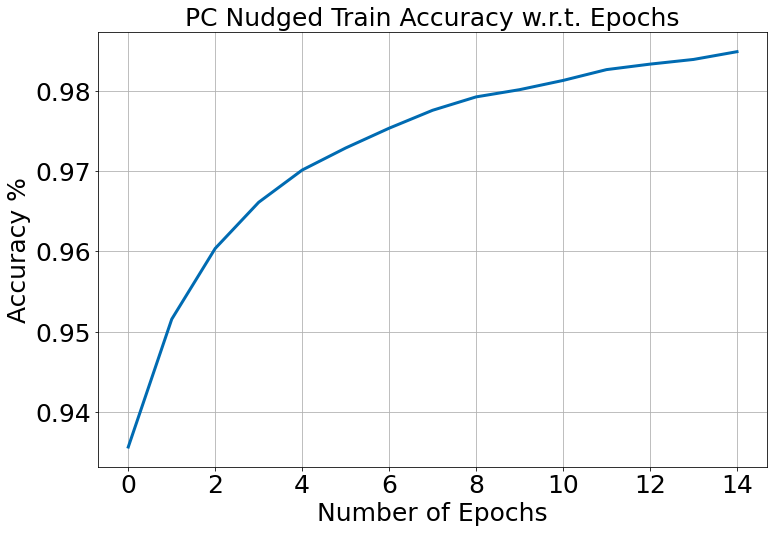

In [7]:
plot_convergence_plot(trn_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'PC Nudged Train Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)

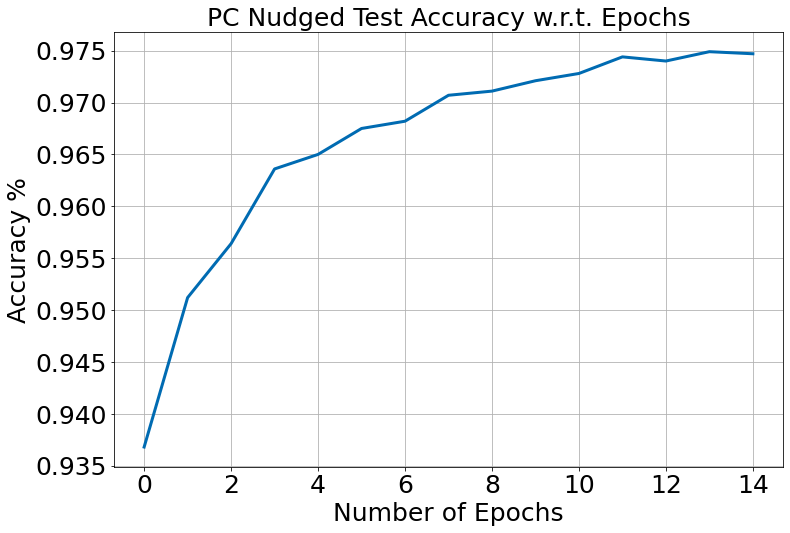

In [8]:
plot_convergence_plot(tst_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'PC Nudged Test Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)